### Iris Flower dataset

### Life cycle of data science project
- Understanding the problem statement
- Data  collection
- Exploratory data analysis
- Data cleaning
- Data preprocessing
- Model trainig
- Choose the best model

#### 1) Problem statement.
A simple dataset to learn the basics.
3 flowers of Iris species. [see images on wikipedia link above]
1936 by Ronald Fisher.
Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.

###  2) Data Collection.

The Dataset is collected from  from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

### Shape of the dataset

(Q) how many data-points and features?

In [5]:
df.shape

(150, 5)

#### Remarks
- 150 data points 
- 5 features

### Check Datatypes in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Remarks
- 4 features are continous
- Target column is categorical

### 3. EXPLORING DATA

In [9]:
#(Q) What are the column names in our dataset?
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
#Defining categorical and numerical columns
numerical_columns=[fea for fea in df.columns if df[fea].dtype !="O"]
categorical_features=[fea for fea in df.columns if df[fea].dtype == "O"]
#print numeric and categorical features
print("we have {} numeric features and {} categorical features".format(len(numerical_columns),len(categorical_features)))
print(" The numeric features are {}".format(numerical_columns))
print(" The categorical features are {}".format(categorical_features))

we have 4 numeric features and 1 categorical features
 The numeric features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
 The categorical features are ['species']


In [19]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

df["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

##### Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.”
The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

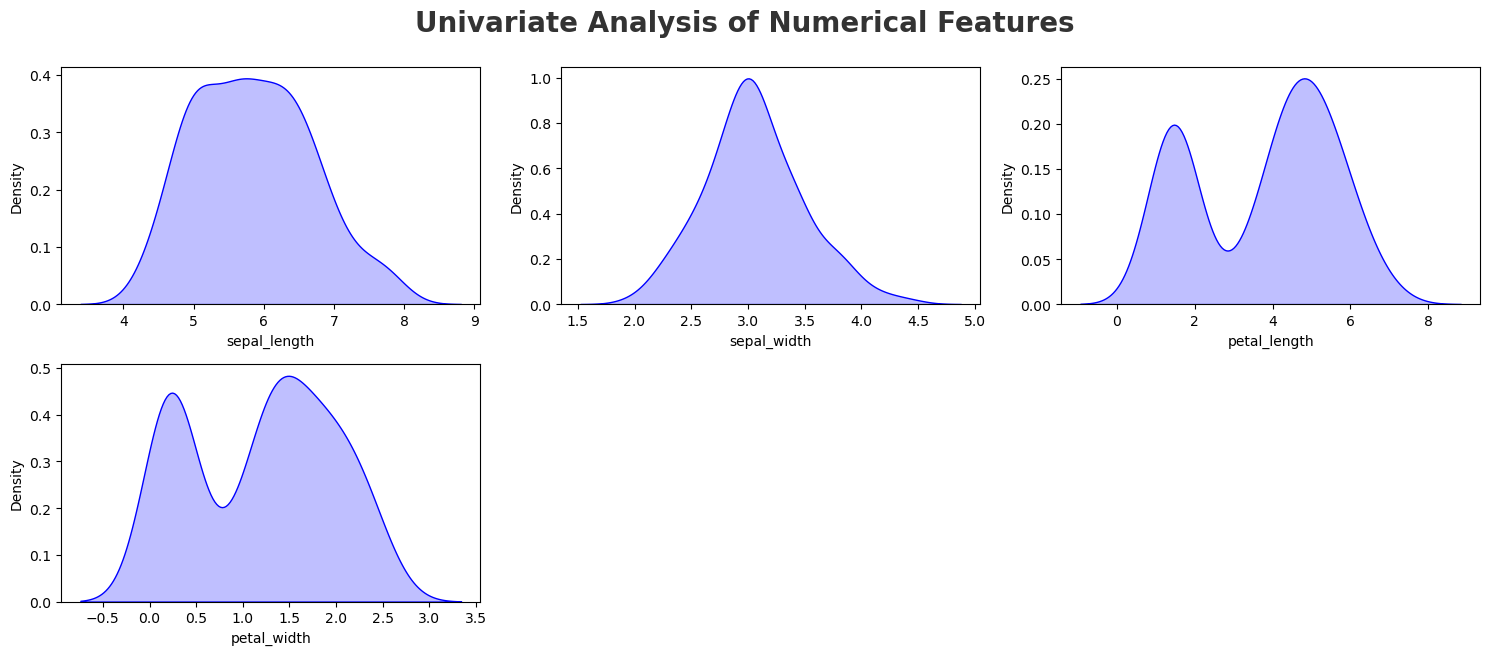

In [21]:

plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight="bold",alpha=0.8,y=1.)
for i in range(0,len(numerical_columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_columns[i]],shade=True,color="b")
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()
    

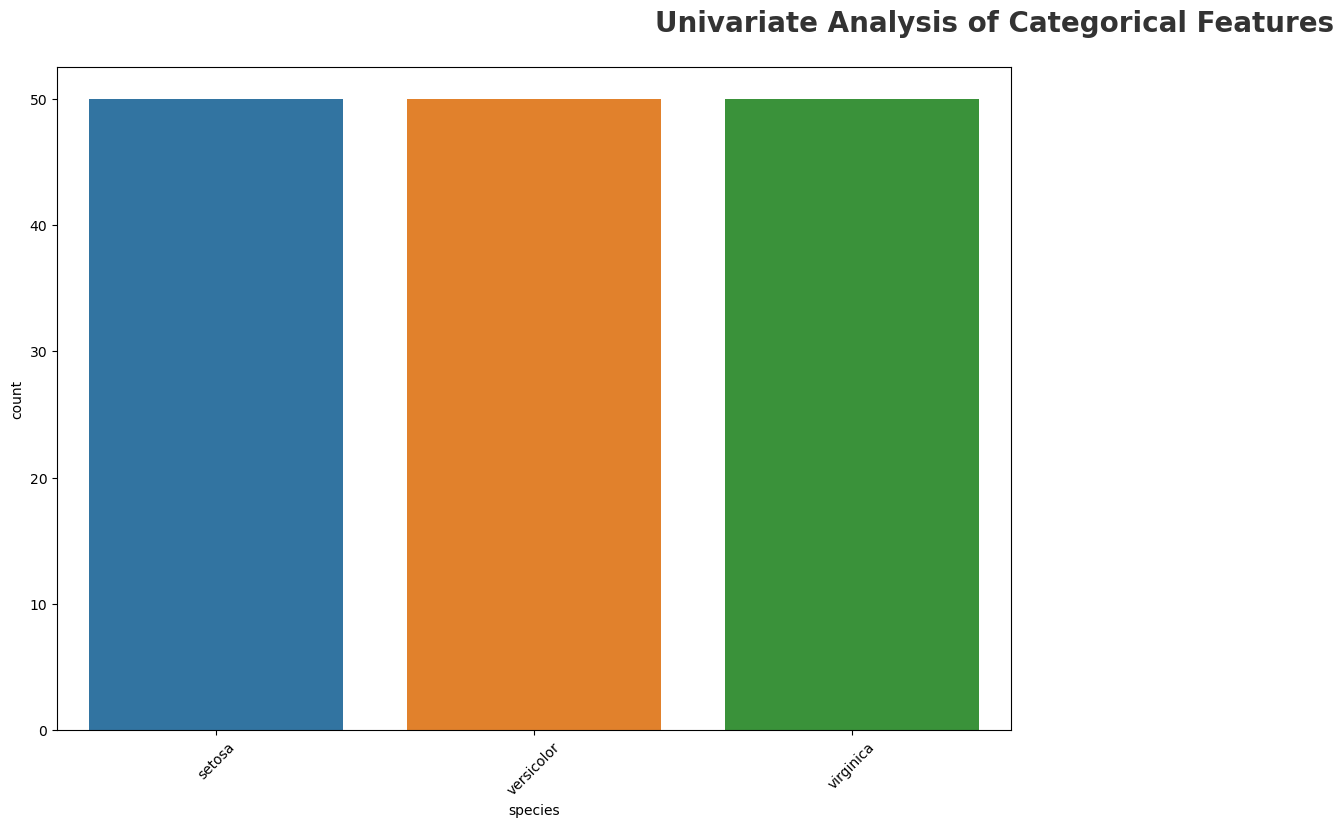

In [23]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Remarks
- Iris is a balanced dataset as the number of data points for every class is 50.

### Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.

In [24]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


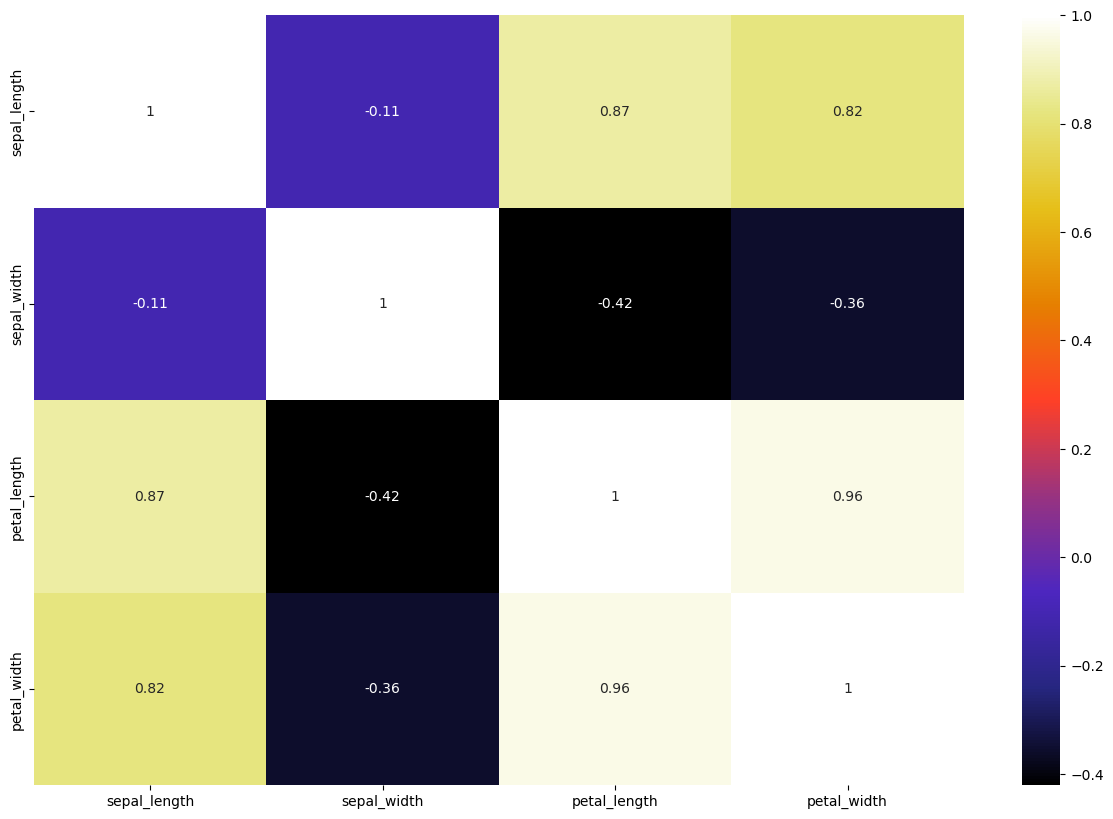

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)
plt.show()

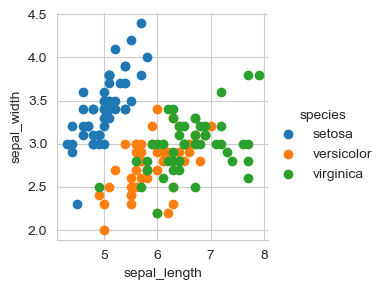

In [29]:
# 2-D Scatter plot with color-coding for each flower type/class.

sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species").map(plt.scatter, "sepal_length", "sepal_width").add_legend();
plt.show();


#### Remarks

-  Notice that the blue points can be easily seperated from red and green by drawing a line. 
- Red and green data points cannot be easily seperated.
- Can we draw multiple 2-D scatter plots for each combination of features?
- How many combinations exist? 4C2 = 6.

In [30]:
continous_feature=[feature for feature in numerical_columns if len(df[feature].unique())>=10]
print('Num of continous features :',continous_feature)

Num of continous features : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


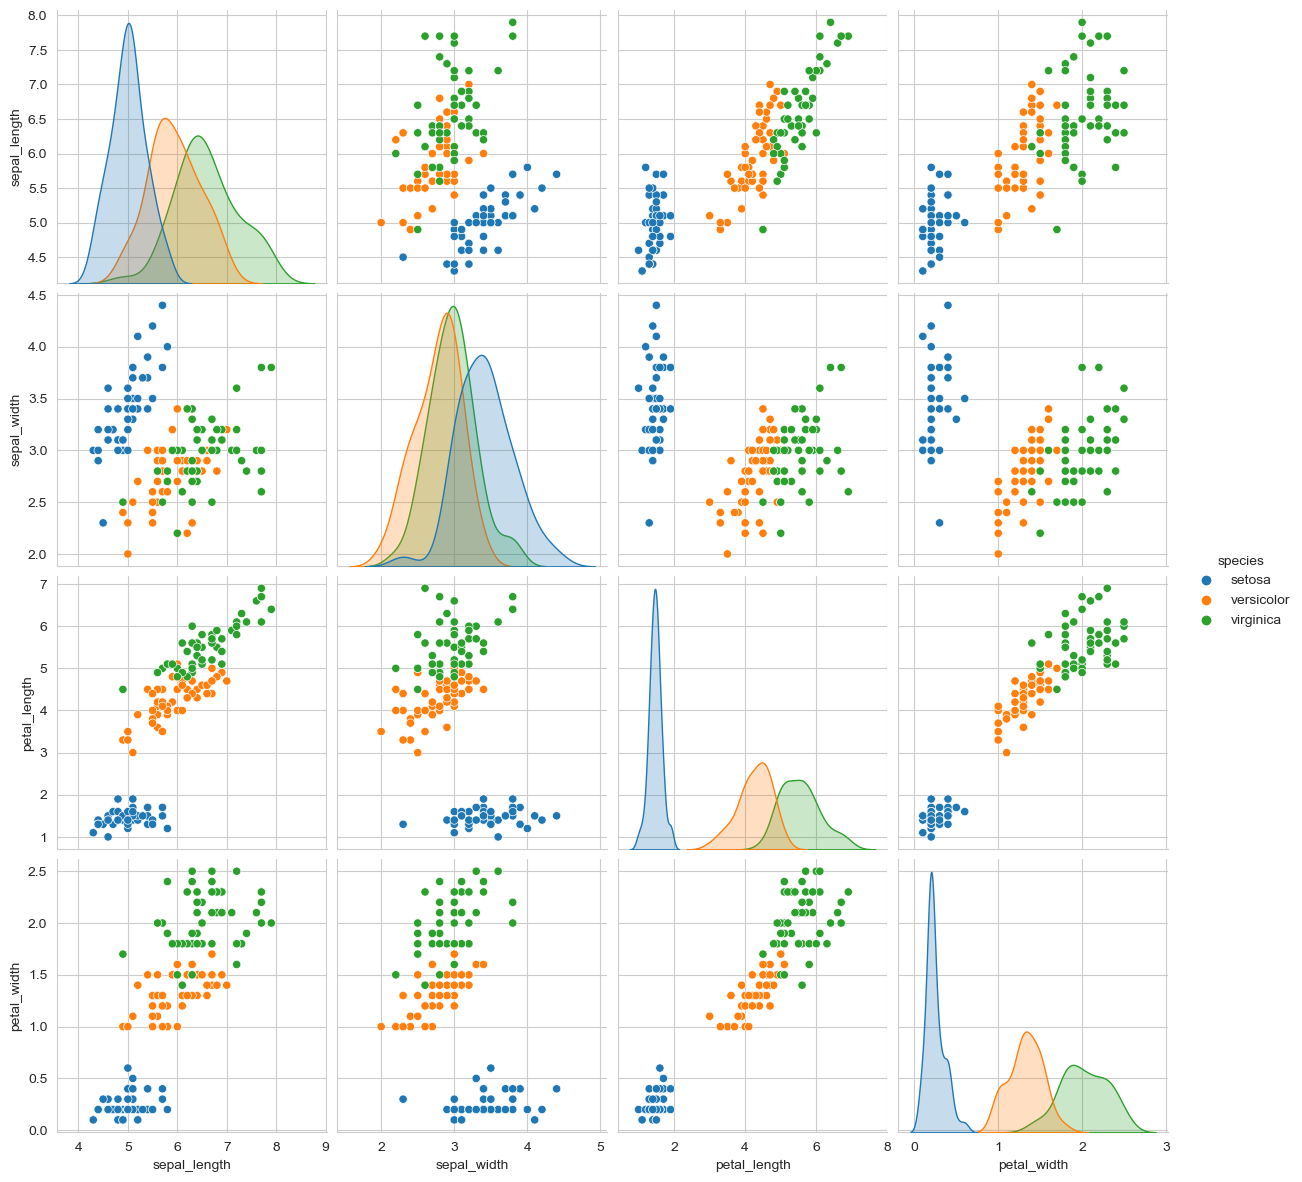

In [34]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

#### Remarks
- petal_length and petal_width are the most useful features to identify various flower types.
- While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
- We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


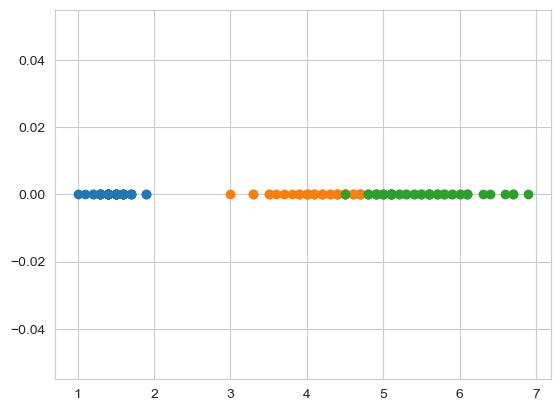

In [36]:
import numpy as np
iris_setosa = df.loc[df["species"] == "setosa"];
iris_virginica = df.loc[df["species"] == "virginica"];
iris_versicolor = df.loc[df["species"] == "versicolor"];

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()

##### Remarks
-  1-D scatter plot: Very hard to make sense as points 
- are overlapping a lot.
-  there are better ways of visualizing 1-D scatter plots

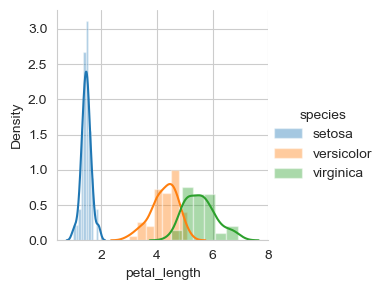

In [39]:
sns.FacetGrid(df, hue="species").map(sns.distplot, "petal_length").add_legend();
plt.show();

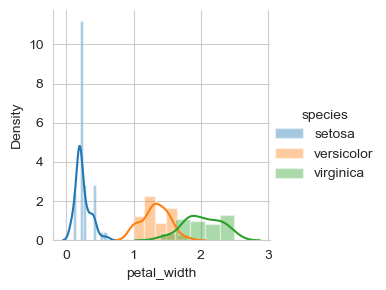

In [40]:
sns.FacetGrid(df, hue="species").map(sns.distplot, "petal_width").add_legend();
plt.show();

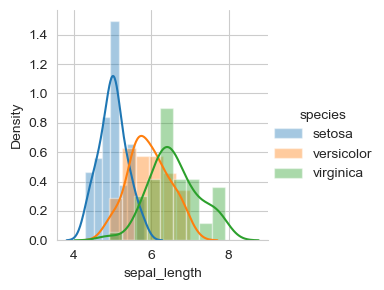

In [41]:
sns.FacetGrid(df, hue="species").map(sns.distplot, "sepal_length").add_legend();
plt.show();

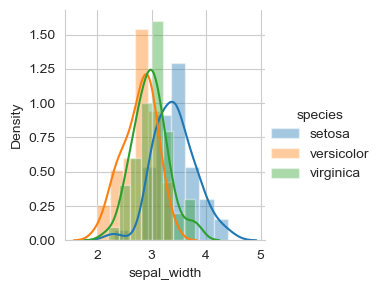

In [43]:
sns.FacetGrid(df, hue="species").map(sns.distplot, "sepal_width").add_legend();
plt.show();

 #### Need for Cumulative Distribution Function (CDF)
- We can visually see what percentage of versicolor flowers have a 
- petal_length of less than 5

#Plot CDF of petal_length


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


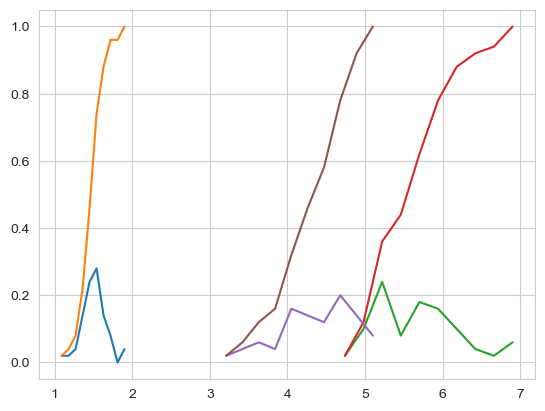

In [44]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

#### Mean, Variance and Std-dev

In [45]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


### (3.6) Median, Percentile, Quantile, IQR, MAD

In [46]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


### (3.7) Box plot and Whiskers

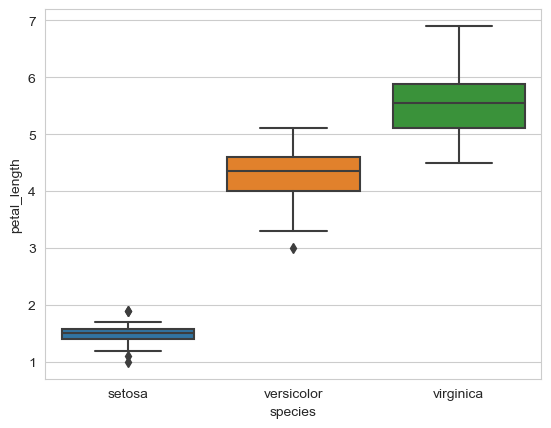

In [48]:
sns.boxplot(x='species',y='petal_length', data=df)
plt.show()

### (3.8) Violin plots

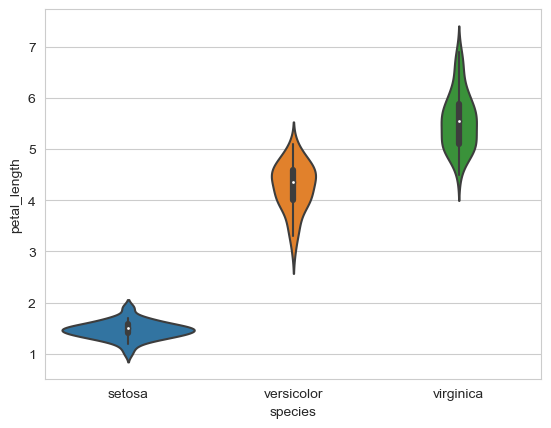

In [50]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=df)
plt.show()